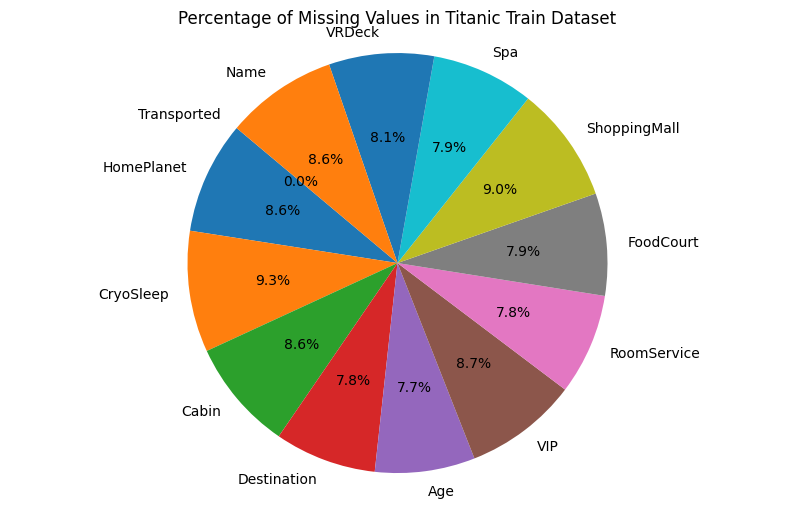

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

train_data = pd.read_csv(r"D:\Projects\Spaceship-Titanic-ML\train.csv")# your path here

missing_values_train = train_data.isnull().sum()
missing_values_train= missing_values_train.drop("PassengerId", axis=0)
plt.figure(figsize=(10, 6))
plt.pie(missing_values_train, labels=missing_values_train.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Missing Values in Titanic Train Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
train_data = pd.read_csv(r"D:\Projects\Spaceship-Titanic-ML\train.csv")# your path here
test_data = pd.read_csv(r"D:\Projects\Spaceship-Titanic-ML\test.csv")# your path here
df = train_data
# Fill missing values with mean for numerical columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())

# Fill missing values with mode for categorical columns
df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])

# Infer object types and cast categorical columns to float
df = df.infer_objects()
df['VIP'] = df['VIP'].astype(float)
df['CryoSleep'] = df['CryoSleep'].astype(float)
train_data = df
y_train = train_data["Transported"]
features = train_data.drop("Transported", axis=1)
X_train = pd.get_dummies(features)
X_test = pd.get_dummies(test_data)


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 7, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)

knn_best = grid_search_knn.best_estimator_
rf_best = grid_search_rf.best_estimator_

clf = VotingClassifier(
		estimators=[('knn_best', knn_best),('rf_best', rf_best)],
        voting='hard'
	)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\4034590029.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\4034590029.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])


KeyboardInterrupt: 

Infinity loading

In [ ]:
output.to_csv(r"D:\Projects\Spaceship-Titanic-ML\predictions.csv", index=False)# your path here